## ***Understanding the Context***

What comes to mind when you think of spam? Miracle pills from Internet pharmacies, requests for money from “princes” of other countries, or perhaps the food, Spam?

Spam is any kind of unwanted, unsolicited digital communication that gets sent out in bulk. Often spam is sent via email, but it can also be distributed via text messages, phone calls, or social media.

## ***Specifying the Question***

I will be using the K-Nearest Neighbors and  Naive Bayes model for my analysis. I will use thoses technics  to improve the accuracy of the base model through different metrics used 
I intend to succesfully be able to identify spam messages

## ***Metrics for Success***

The metric of success for this project is the model accuracy. The model accuracy shows how well a particular model predicts the dependent variable when tested after training it. The accuracy will be derived using the accuracy score. An accuracy that is low shows our model fails to accurately predict the dependent variable and the data may be underfit while an accuracy of 1 is not good either since the model is overfitted. In this project, my aim is to achieve an accuracy of at least 80%.

## ***The Experimental Design***

The experimental design for this project is as follows:

* Loading the libraries and dataset
* Data cleaning and preparation
* Performing the Univariate analysis
* Performing the Bivariate analysis
* Making predictions using the different models that I've created
* Assesing the accuracy of the models created
* Making conclusions

## ***Importing Library***

In [88]:
# Import library

import pickle 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import metrics

## ***Read Dataset***

In [98]:
df = pd.read_csv('Spam.csv')

In [99]:
df.shape

(4601, 58)

In [100]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## ***Check Info and Description***

In [101]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

## ***Correlation***

In [103]:
# Check correlation of each variable

df.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,...,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,...,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,...,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,...,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,...,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,...,-0.019119,-0.008705,-0.015133,0.065043,0.105692,0.019894,-0.010278,0.090172,0.082089,0.232604
word_freq_remove,0.007669,0.003918,0.036677,0.019784,0.147336,0.061163,1.000000,0.044545,0.050786,0.056809,...,-0.033089,-0.051885,-0.027653,0.053706,0.070127,0.046612,0.041565,0.059677,-0.008344,0.332117
word_freq_internet,-0.003950,-0.016280,0.012003,0.010268,0.029598,0.079561,0.044545,1.000000,0.105302,0.083129,...,-0.027432,-0.032494,-0.019548,0.031454,0.057910,-0.008012,0.011254,0.037575,0.040252,0.206808
word_freq_order,0.106263,-0.003826,0.093786,-0.002454,0.020823,0.117438,0.050786,0.105302,1.000000,0.130624,...,-0.014646,-0.031003,0.013601,0.043639,0.149365,-0.000522,0.111308,0.189247,0.248724,0.231551
word_freq_mail,0.041198,0.032962,0.032075,-0.004947,0.034495,0.013897,0.056809,0.083129,0.130624,1.000000,...,0.011945,0.003936,0.007357,0.036737,0.075786,0.044830,0.073677,0.103308,0.087273,0.138962


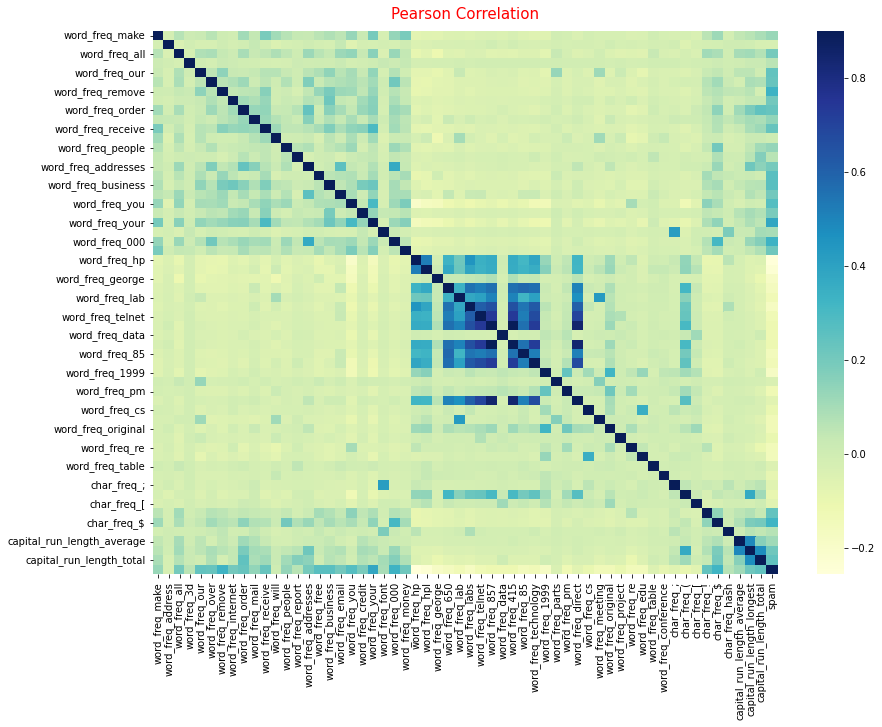

In [106]:
# Visualize correlation of variable using pearson correlation

plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), vmax = 0.9, cmap = 'YlGnBu')
plt.title('Pearson Correlation', fontsize = 15, pad = 12, color = 'r')
plt.show()

In [109]:
# Transform spam column to categorical data

df.spam[df['spam'] == 0] = 'ham'
df.spam[df['spam'] == 1] = 'spam'
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,spam
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,spam
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,spam
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,spam


## ***Exploratory Data Analysis (EDA)***

In [110]:
# Analyze of spam status based on capital run length average

pd.pivot_table(df, index = 'spam', values = 'capital_run_length_average', 
               aggfunc = {'capital_run_length_average' : np.mean}).sort_values('capital_run_length_average', ascending = False)

,capital_run_length_average
spam,
spam,9.519165
ham,2.377301


In [111]:
# Analyze of spam status based on count of capital run length longest

pd.pivot_table(df, index = 'spam', values = 'capital_run_length_longest',
              aggfunc = {'capital_run_length_longest' : np.sum}).sort_values('capital_run_length_longest', ascending = False)

,capital_run_length_longest
spam,
spam,189265
ham,50782


In [112]:
# Analyze of spam status based on count of capital run length total

pd.pivot_table(df, index = 'spam', values = 'capital_run_length_total',
              aggfunc = {'capital_run_length_total' : np.sum}).sort_values('capital_run_length_total', ascending = False)

,capital_run_length_total
spam,
spam,853233
ham,450181


In [116]:
# Analyze of spam status based on capital run length average, capital run length longest and capital run length total

pd.pivot_table(df, index = 'spam', values = ['capital_run_length_average', 'capital_run_length_longest', 
                                             'capital_run_length_total'], 
               aggfunc = {'capital_run_length_average' : np.mean, 'capital_run_length_longest' : np.sum, 
                          'capital_run_length_total' : np.sum}).sort_values(['capital_run_length_average', 
                                                                             'capital_run_length_longest', 
                                                                             'capital_run_length_total'], ascending = False)

,capital_run_length_average,capital_run_length_longest,capital_run_length_total
spam,,,
spam,9.519165,189265,853233
ham,2.377301,50782,450181


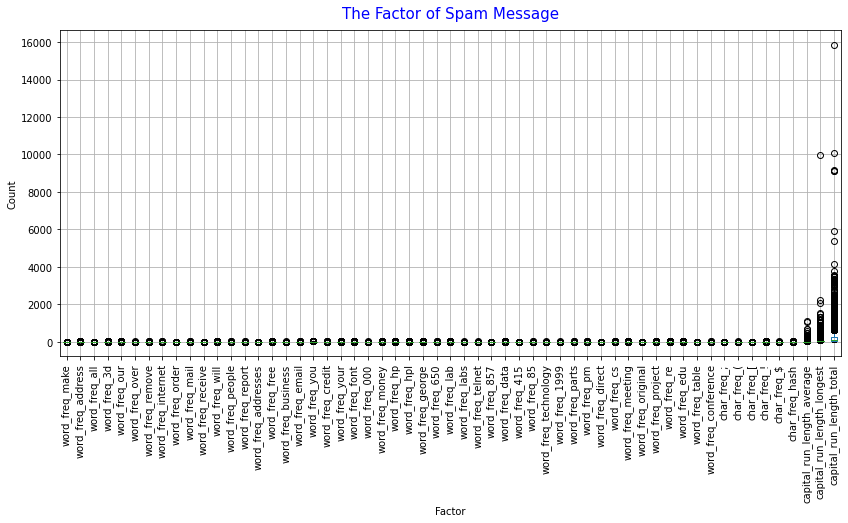

In [117]:
# Visualize the factor of spam message based on capital run length average, capital run length longest and capital run length total

plt.figure(figsize = (14,6))
chart = df.boxplot()
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.title('The Factor of Spam Message', fontsize = 15, pad = 12, color = 'b')
plt.xlabel('Factor')
plt.ylabel('Count')
plt.show()


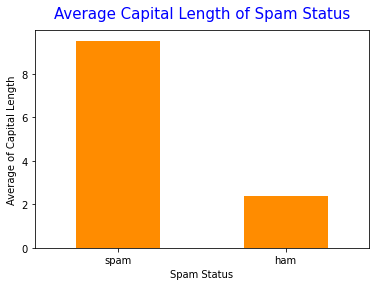

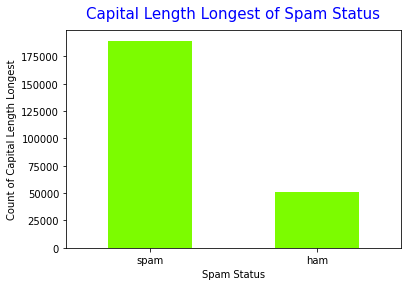

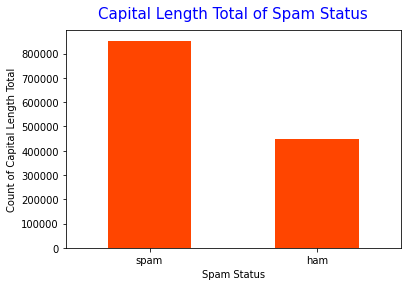

In [118]:
# Visualize of spam status based on capital run length average

chart = df.groupby('spam')['capital_run_length_average'].mean().sort_values(ascending = False).plot(kind = 'bar', 
                                                                                                    color = 'darkorange')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Average Capital Length of Spam Status', fontsize = 15, pad = 12, color = 'b')
plt.xlabel('Spam Status')
plt.ylabel('Average of Capital Length')
plt.show()

# Visualize of spam status based on capital run length longest

chart = df.groupby('spam')['capital_run_length_longest'].sum().sort_values(ascending = False).plot(kind = 'bar', 
                                                                                                    color = 'lawngreen')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Capital Length Longest of Spam Status', fontsize = 15, pad = 12, color = 'b')
plt.xlabel('Spam Status')
plt.ylabel('Count of Capital Length Longest')
plt.show()

# Visualize of spam status based on capital run length total

chart = df.groupby('spam')['capital_run_length_total'].sum().sort_values(ascending = False).plot(kind = 'bar', 
                                                                                                    color = 'orangered')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Capital Length Total of Spam Status', fontsize = 15, pad = 12, color = 'b')
plt.xlabel('Spam Status')
plt.ylabel('Count of Capital Length Total')
plt.show()

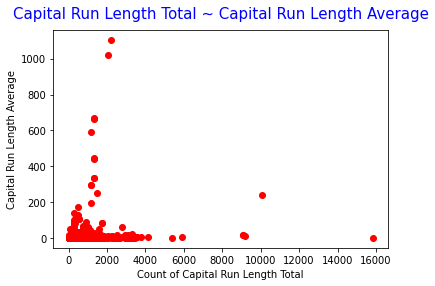

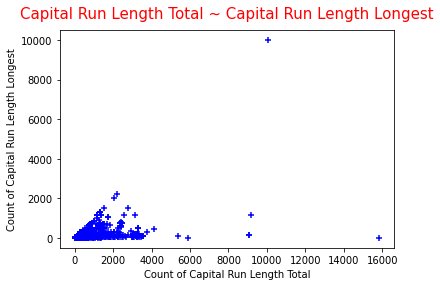

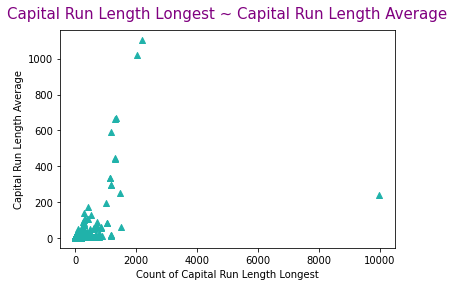

In [119]:
# Visualize correlation of capital run length total and capital run length average

plt.scatter(df['capital_run_length_total'], df['capital_run_length_average'], marker = 'o', color = 'r')
plt.title('Capital Run Length Total ~ Capital Run Length Average', fontsize = 15, pad = 12, color = 'b')
plt.xlabel('Count of Capital Run Length Total')
plt.ylabel('Capital Run Length Average')
plt.show()

# Visualize correlation of capital run length total and capital run length longest

plt.scatter(df['capital_run_length_total'], df['capital_run_length_longest'], marker = '+', color = 'b')
plt.title('Capital Run Length Total ~ Capital Run Length Longest', fontsize = 15, pad = 12, color = 'r')
plt.xlabel('Count of Capital Run Length Total')
plt.ylabel('Count of Capital Run Length Longest')
plt.show()

# Visualize correlation of capital run length longest and capital run length average

plt.scatter(df['capital_run_length_longest'], df['capital_run_length_average'], marker = '^', color = 'lightseagreen')
plt.title('Capital Run Length Longest ~ Capital Run Length Average', fontsize = 15, pad = 12, color = 'purple')
plt.xlabel('Count of Capital Run Length Longest')
plt.ylabel('Capital Run Length Average')
plt.show()

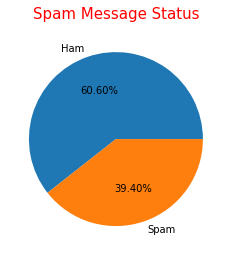

In [120]:
# Visualize spam status

spam = [np.count_nonzero(df['spam'] == 'ham'),
       np.count_nonzero(df['spam'] == 'spam')]
activities = ['Ham', 'Spam']
plt.pie(spam, labels = activities, autopct = '%1.2f%%')
plt.title('Spam Message Status', fontsize = 15, pad = 12, color = 'r')
plt.show()

## ***Baseline Model - 70/30 split***

In [121]:
# Handling categorical data

df['spam'] = df['spam'].astype('category').cat.codes

# Splitting data

X = df.drop('spam', axis = 1)
y = df['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3220, 57)
(3220,)
(1381, 57)
(1381,)


## ***Gaussian Naive Bayes***

In [123]:
# Build model

gnb = GaussianNB()
%time gnb.fit(X_train, y_train)
print('Accuracy Score :', gnb.score(X_test, y_test))

CPU times: user 8.05 ms, sys: 2.95 ms, total: 11 ms
Wall time: 12.5 ms
Accuracy Score : 0.8247646632874729


In [125]:
# Calculate prediction probability

prob_train = np.squeeze(gnb.predict_proba(X_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(gnb.predict_proba(X_test)[:,1].reshape(1,-1))
print('Probability of Training Set : \n', prob_train)
print('\nProbability of Testing Set : \n', prob_test)

Probability of Training Set : 
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 0.00000000e+00
 6.17455061e-28 1.00000000e+00]

Probability of Testing Set : 
 [1.00000000e+00 5.33622534e-07 6.66529549e-13 ... 9.99999774e-01
 1.00000000e+00 2.76015674e-54]


In [126]:
# Prediction

y_pred = gnb.predict(X_test)
print(y_pred)

[1 0 0 ... 1 1 0]


      Spam  Ham
Spam   592  212
Ham     30  547


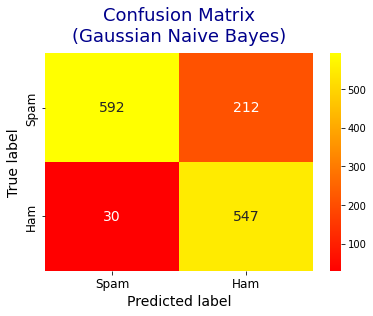

In [127]:
# Confusion matrix

matrix = pd.DataFrame((metrics.confusion_matrix(y_test, y_pred)), ('Spam', 'Ham'), ('Spam', 'Ham'))
print(matrix)

# Visualize confusion matrix

heatmap = sns.heatmap(matrix, annot = True, annot_kws = {'size': 14}, fmt = 'd', cmap = 'autumn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), fontsize = 12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize = 12)

plt.title('Confusion Matrix\n(Gaussian Naive Bayes)', fontsize = 18, pad = 12, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()


In [128]:
# Classification report

report = metrics.classification_report(y_test, y_pred)
print('Classification Report of Gaussian Naive Bayes : \n')
print(report)

Classification Report of Gaussian Naive Bayes : 

              precision    recall  f1-score   support

           0       0.95      0.74      0.83       804
           1       0.72      0.95      0.82       577

    accuracy                           0.82      1381
   macro avg       0.84      0.84      0.82      1381
weighted avg       0.86      0.82      0.83      1381



## ***K-Nearest Neighbors***

In [129]:
# Setup arrays to store training and test accuracy

neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 

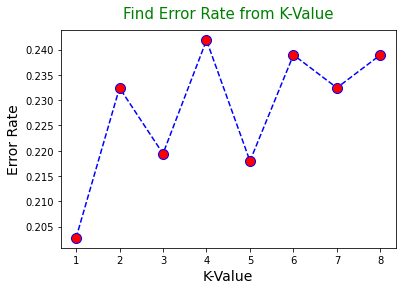

In [130]:
# Find good K-value from error rate

error_rate = []

for i in range(1,9):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.plot(range(1,9), error_rate, color = 'blue',
                linestyle = 'dashed', marker = 'o',
                markerfacecolor = 'red', markersize = 10)

plt.title('Find Error Rate from K-Value', fontsize = 15, pad = 12, color = 'g')
plt.xlabel('K-Value', fontsize = 14)
plt.ylabel('Error Rate', fontsize = 14)
plt.show()


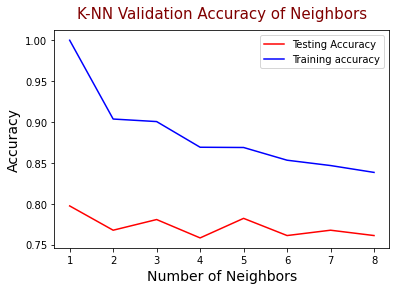

In [131]:
# Visualize knn model for training and testing

plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy', color = 'r')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy', color = 'b')
plt.title('K-NN Validation Accuracy of Neighbors', fontsize = 15, pad = 12, color = 'maroon')
plt.legend()
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.show()

In [134]:
# Build model

knn = KNeighborsClassifier(n_neighbors = 5)
%time knn.fit(X_train, y_train)
print('Accuracy Score :', knn.score(X_test, y_test))

CPU times: user 7.4 ms, sys: 0 ns, total: 7.4 ms
Wall time: 8.36 ms
Accuracy Score : 0.782041998551774


In [136]:
# Calculate prediction probability

prob_train = np.squeeze(knn.predict_proba(X_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(knn.predict_proba(X_test)[:,1].reshape(1,-1))
print('Probability of Training Set : \n', prob_train)
print('\nProbability of Testing Set : \n', prob_test)

Probability of Training Set : 
 [0.2 1.  1.  ... 0.  0.2 0.6]

Probability of Testing Set : 
 [0.  0.4 0.  ... 1.  0.2 0. ]


In [140]:
# Prediction

y_pred = knn.predict(X_test)
print(y_pred)

[0 0 0 ... 1 0 0]


      Spam  Ham
Spam   676  128
Ham    173  404


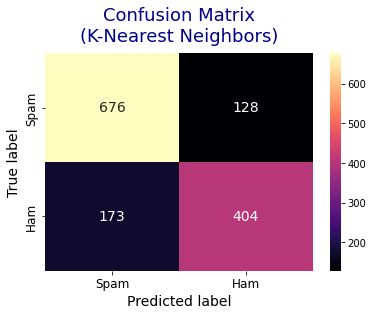

In [142]:
# Confusion matrix

matrix = pd.DataFrame((metrics.confusion_matrix(y_test, y_pred)), ('Spam', 'Ham'), ('Spam', 'Ham'))
print(matrix)

# Visualize confusion matrix

heatmap = sns.heatmap(matrix, annot = True, annot_kws = {'size': 14}, fmt = 'd', cmap = 'magma')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), fontsize = 12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize = 12)

plt.title('Confusion Matrix\n(K-Nearest Neighbors)', fontsize = 18, pad = 12, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

In [143]:
# Classification report 

report = metrics.classification_report(y_test, y_pred)
print('Classification Report of K-Nearest Neighbors : \n')
print(report)

Classification Report of K-Nearest Neighbors : 

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       804
           1       0.76      0.70      0.73       577

    accuracy                           0.78      1381
   macro avg       0.78      0.77      0.77      1381
weighted avg       0.78      0.78      0.78      1381



## ***Comparison of Machine Learning Algorithm***

In [144]:
# Prepare models

classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    GaussianNB()]

In [145]:
# Report models

log_cols = ["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns = log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')
    
    train_predictions = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict(X_test)
    ll = metrics.log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")
    
    log_entry = pd.DataFrame([[name, acc * 100, ll]], columns = log_cols)
    log = log.append(log_entry)
    
print("=" * 30)

KNeighborsClassifier
****Results****
Accuracy: 78.2042%
Log Loss: 7.528076787356395


GaussianNB
****Results****
Accuracy: 82.4765%
Log Loss: 6.052536858959876




## ***Conclusion***

The best accuracy for this test is GaussianNB with 82.47 compared to KNN with the accuracy with 78.2

## ***Baseline Model - 80/20 split***

In [148]:
# Handling categorical data

df['spam'] = df['spam'].astype('category').cat.codes

# Splitting data

X = df.drop('spam', axis = 1)
y = df['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3680, 57)
(3680,)
(921, 57)
(921,)


## ***Gaussian Naive Bayes***

In [149]:
# Build model

gnb = GaussianNB()
%time gnb.fit(X_train, y_train)
print('Accuracy Score :', gnb.score(X_test, y_test))

CPU times: user 12.5 ms, sys: 0 ns, total: 12.5 ms
Wall time: 11.3 ms
Accuracy Score : 0.8208469055374593


In [150]:
# Calculate prediction probability

prob_train = np.squeeze(gnb.predict_proba(X_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(gnb.predict_proba(X_test)[:,1].reshape(1,-1))
print('Probability of Training Set : \n', prob_train)
print('\nProbability of Testing Set : \n', prob_test)

Probability of Training Set : 
 [1.00000000e+00 1.81519382e-41 2.21183235e-25 ... 0.00000000e+00
 1.60758085e-32 1.00000000e+00]

Probability of Testing Set : 
 [1.00000000e+000 3.06819165e-010 6.84756259e-016 1.00000000e+000
 4.17117842e-190 1.00000000e+000 0.00000000e+000 0.00000000e+000
 7.67198885e-123 1.00000000e+000 1.33525725e-040 1.00000000e+000
 5.55457491e-287 1.00000000e+000 2.88873810e-006 0.00000000e+000
 1.00000000e+000 1.67883130e-080 1.00000000e+000 0.00000000e+000
 0.00000000e+000 1.00000000e+000 1.00000000e+000 3.40019259e-161
 1.00000000e+000 9.99687960e-001 1.00000000e+000 3.39158628e-032
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 0.00000000e+000 1.00000000e+000 9.48277229e-001 0.00000000e+000
 1.10535371e-014 1.00000000e+000 0.00000000e+000 1.00000000e+000
 1.00000000e+000 0.00000000e+000 0.00000000e+000 3.25419435e-213
 1.00000000e+000 1.00000000e+000 1.00000000e+000 0.00000000e+000
 2.45436164e-013 1.00000000e+000 1.00000000e+000 1.00000000

In [152]:
# Prediction

y_pred = gnb.predict(X_test)
print(y_pred)

[1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0
 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1
 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1
 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1
 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1
 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1
 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1
 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1
 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0
 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1
 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1
 1 0 1 1 0 0 1 0 0 1 1 1 

      Spam  Ham
Spam   387  144
Ham     21  369


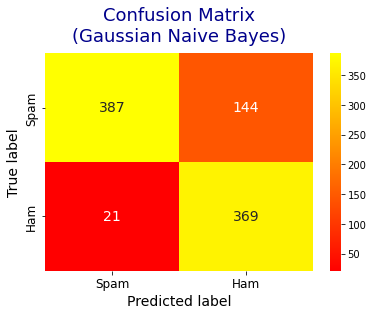

In [153]:
# Confusion matrix

matrix = pd.DataFrame((metrics.confusion_matrix(y_test, y_pred)), ('Spam', 'Ham'), ('Spam', 'Ham'))
print(matrix)

# Visualize confusion matrix

heatmap = sns.heatmap(matrix, annot = True, annot_kws = {'size': 14}, fmt = 'd', cmap = 'autumn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), fontsize = 12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize = 12)

plt.title('Confusion Matrix\n(Gaussian Naive Bayes)', fontsize = 18, pad = 12, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()


In [154]:
# Classification report

report = metrics.classification_report(y_test, y_pred)
print('Classification Report of Gaussian Naive Bayes : \n')
print(report)

Classification Report of Gaussian Naive Bayes : 

              precision    recall  f1-score   support

           0       0.95      0.73      0.82       531
           1       0.72      0.95      0.82       390

    accuracy                           0.82       921
   macro avg       0.83      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921



## ***K-Nearest Neighbors***

In [155]:
# Setup arrays to store training and test accuracy

neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 

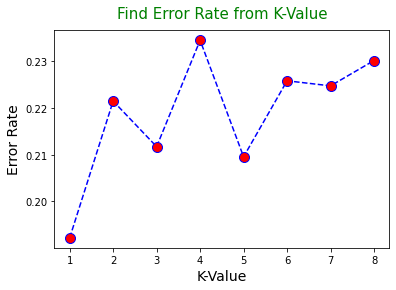

In [159]:
# Find good K-value from error rate

error_rate = []

for i in range(1,9):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.plot(range(1,9), error_rate, color = 'blue',
                linestyle = 'dashed', marker = 'o',
                markerfacecolor = 'red', markersize = 10)

plt.title('Find Error Rate from K-Value', fontsize = 15, pad = 12, color = 'g')
plt.xlabel('K-Value', fontsize = 14)
plt.ylabel('Error Rate', fontsize = 14)
plt.show()


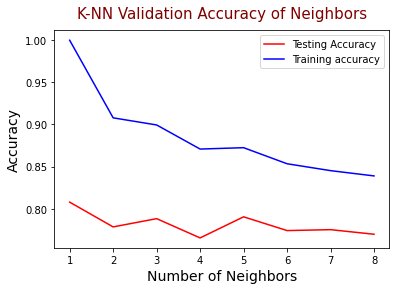

In [160]:
# Visualize knn model for training and testing

plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy', color = 'r')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy', color = 'b')
plt.title('K-NN Validation Accuracy of Neighbors', fontsize = 15, pad = 12, color = 'maroon')
plt.legend()
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.show()

In [161]:
# Build model

knn = KNeighborsClassifier(n_neighbors = 5)
%time knn.fit(X_train, y_train)
print('Accuracy Score :', knn.score(X_test, y_test))

CPU times: user 6.7 ms, sys: 109 µs, total: 6.81 ms
Wall time: 5.3 ms
Accuracy Score : 0.7904451682953312


In [164]:
# Calculate prediction probability

prob_train = np.squeeze(knn.predict_proba(X_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(knn.predict_proba(X_test)[:,1].reshape(1,-1))
print('Probability of Training Set : \n', prob_train)
print('\nProbability of Testing Set : \n', prob_test)

Probability of Training Set : 
 [1.  0.  0.2 ... 0.  0.4 0.8]

Probability of Testing Set : 
 [0.  0.4 0.  0.6 0.2 0.  0.2 1.  0.  0.  1.  0.  0.  0.6 0.4 0.  1.  0.
 0.8 0.  0.  0.8 1.  1.  1.  0.  1.  0.4 1.  0.8 1.  0.8 0.  0.2 0.4 0.
 0.4 0.6 0.2 1.  0.8 0.2 0.  0.  0.4 0.4 0.8 0.  0.6 0.6 1.  0.  0.  0.6
 0.  1.  0.  0.  0.  0.4 0.6 0.  0.2 0.4 0.  0.  0.  0.  1.  0.  0.4 0.2
 0.6 0.2 1.  0.2 0.  0.  0.4 0.8 0.  0.2 0.8 0.  0.  0.  1.  1.  0.4 0.
 0.6 0.6 0.2 0.6 0.8 0.  0.6 0.  1.  0.6 0.  0.6 0.  1.  0.4 0.4 0.  1.
 0.4 0.8 0.2 1.  0.6 0.4 1.  1.  0.2 0.4 0.  0.  1.  0.  0.4 0.  0.6 0.8
 0.2 0.  0.8 0.4 0.2 1.  0.6 0.  0.  0.  0.4 0.8 0.  1.  0.2 1.  0.  0.
 1.  0.2 0.4 0.  0.2 0.6 0.  1.  1.  0.  0.2 0.  0.2 0.4 0.2 0.  1.  0.4
 1.  0.4 1.  0.  0.6 0.4 0.6 1.  0.  0.4 0.2 0.4 0.8 0.4 1.  0.6 0.  1.
 0.  0.4 0.2 0.2 0.6 0.2 0.  0.  0.4 0.  0.6 0.  1.  0.  0.6 0.4 0.6 0.
 0.  0.4 0.  0.2 1.  0.  0.2 1.  0.  0.6 0.  0.2 0.6 0.4 0.6 0.  0.8 0.
 0.  0.  0.4 0.2 0.2 1.  1.  0.2 1.  0

In [165]:
# Prediction

y_pred = knn.predict(X_test)
print(y_pred)

[0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0
 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0
 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1
 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1
 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1
 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0
 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1
 0 0 1 1 0 0 0 0 0 1 1 0 

      Spam  Ham
Spam   450   81
Ham    112  278


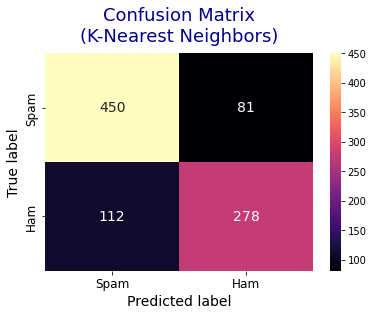

In [166]:
# Confusion matrix

matrix = pd.DataFrame((metrics.confusion_matrix(y_test, y_pred)), ('Spam', 'Ham'), ('Spam', 'Ham'))
print(matrix)

# Visualize confusion matrix

heatmap = sns.heatmap(matrix, annot = True, annot_kws = {'size': 14}, fmt = 'd', cmap = 'magma')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), fontsize = 12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize = 12)

plt.title('Confusion Matrix\n(K-Nearest Neighbors)', fontsize = 18, pad = 12, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

In [167]:
# Classification report 

report = metrics.classification_report(y_test, y_pred)
print('Classification Report of K-Nearest Neighbors : \n')
print(report)

Classification Report of K-Nearest Neighbors : 

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       531
           1       0.77      0.71      0.74       390

    accuracy                           0.79       921
   macro avg       0.79      0.78      0.78       921
weighted avg       0.79      0.79      0.79       921



## ***Comparison of Machine Learning Algorithm***

In [168]:
# Prepare models

classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    GaussianNB()]

In [169]:
# Report models

log_cols = ["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns = log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')
    
    train_predictions = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict(X_test)
    ll = metrics.log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")
    
    log_entry = pd.DataFrame([[name, acc * 100, ll]], columns = log_cols)
    log = log.append(log_entry)
    
print("=" * 30)

KNeighborsClassifier
****Results****
Accuracy: 79.0445%
Log Loss: 7.237837797621723


GaussianNB
****Results****
Accuracy: 82.0847%
Log Loss: 6.18785368858872




## ***Conclusion***

The best accuracy for this test is GaussianNB with 82.08 compared to KNN with the accuracy with 79.04

## ***Baseline Model - 60/40 split***

In [170]:
# Handling categorical data

df['spam'] = df['spam'].astype('category').cat.codes

# Splitting data

X = df.drop('spam', axis = 1)
y = df['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2760, 57)
(2760,)
(1841, 57)
(1841,)


## ***Gaussian Naive Bayes***

In [172]:
# Build model

gnb = GaussianNB()
%time gnb.fit(X_train, y_train)
print('Accuracy Score :', gnb.score(X_test, y_test))

CPU times: user 6.67 ms, sys: 2.98 ms, total: 9.65 ms
Wall time: 11.8 ms
Accuracy Score : 0.8169473112438892


In [174]:
# Calculate prediction probability

prob_train = np.squeeze(gnb.predict_proba(X_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(gnb.predict_proba(X_test)[:,1].reshape(1,-1))
print('Probability of Training Set : \n', prob_train)
print('\nProbability of Testing Set : \n', prob_test)

Probability of Training Set : 
 [0.00000000e+000 1.00000000e+000 1.52342660e-044 ... 6.89874506e-302
 4.29320353e-024 1.00000000e+000]

Probability of Testing Set : 
 [1.00000000e+000 7.52626228e-007 1.93219242e-010 ... 1.00000000e+000
 1.00000000e+000 5.17740526e-186]


In [175]:
# Prediction

y_pred = gnb.predict(X_test)
print(y_pred)

[1 0 0 ... 1 1 0]


      Spam  Ham
Spam   786  303
Ham     34  718


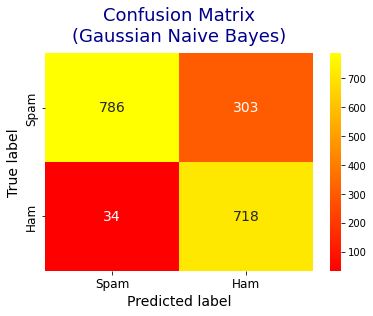

In [176]:
# Confusion matrix

matrix = pd.DataFrame((metrics.confusion_matrix(y_test, y_pred)), ('Spam', 'Ham'), ('Spam', 'Ham'))
print(matrix)

# Visualize confusion matrix

heatmap = sns.heatmap(matrix, annot = True, annot_kws = {'size': 14}, fmt = 'd', cmap = 'autumn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), fontsize = 12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize = 12)

plt.title('Confusion Matrix\n(Gaussian Naive Bayes)', fontsize = 18, pad = 12, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

In [179]:
# Classification report

report = metrics.classification_report(y_test, y_pred)
print('Classification Report of Gaussian Naive Bayes : \n')
print(report)

Classification Report of Gaussian Naive Bayes : 

              precision    recall  f1-score   support

           0       0.96      0.72      0.82      1089
           1       0.70      0.95      0.81       752

    accuracy                           0.82      1841
   macro avg       0.83      0.84      0.82      1841
weighted avg       0.85      0.82      0.82      1841



## ***K-Nearest Neighbors***

In [183]:
# Setup arrays to store training and test accuracy

neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 

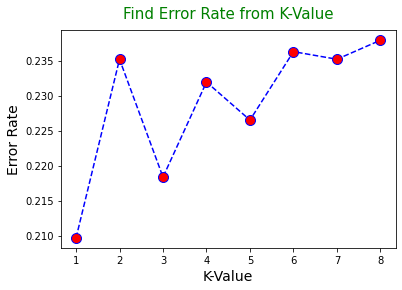

In [186]:
# Find good K-value from error rate

error_rate = []

for i in range(1,9):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.plot(range(1,9), error_rate, color = 'blue',
                linestyle = 'dashed', marker = 'o',
                markerfacecolor = 'red', markersize = 10)

plt.title('Find Error Rate from K-Value', fontsize = 15, pad = 12, color = 'g')
plt.xlabel('K-Value', fontsize = 14)
plt.ylabel('Error Rate', fontsize = 14)
plt.show()


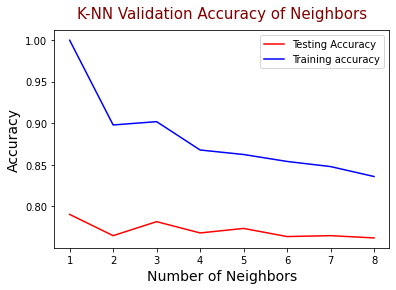

In [187]:
# Visualize knn model for training and testing

plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy', color = 'r')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy', color = 'b')
plt.title('K-NN Validation Accuracy of Neighbors', fontsize = 15, pad = 12, color = 'maroon')
plt.legend()
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.show()

In [189]:
# Build model

knn = KNeighborsClassifier(n_neighbors = 5)
%time knn.fit(X_train, y_train)
print('Accuracy Score :', knn.score(X_test, y_test))

CPU times: user 5.53 ms, sys: 2.18 ms, total: 7.71 ms
Wall time: 7.59 ms
Accuracy Score : 0.7734926670287887


In [192]:
# Calculate prediction probability

prob_train = np.squeeze(knn.predict_proba(X_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(knn.predict_proba(X_test)[:,1].reshape(1,-1))
print('Probability of Training Set : \n', prob_train)
print('\nProbability of Testing Set : \n', prob_test)

Probability of Training Set : 
 [0.  0.  0.2 ... 0.  0.2 0.6]

Probability of Testing Set : 
 [0.  0.4 0.  ... 0.4 1.  0.2]


In [193]:
# Prediction

y_pred = knn.predict(X_test)
print(y_pred)

[0 0 0 ... 0 1 0]


      Spam  Ham
Spam   906  183
Ham    234  518


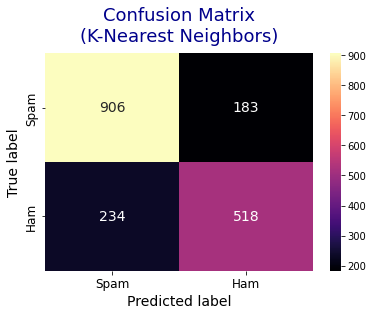

In [195]:
# Confusion matrix

matrix = pd.DataFrame((metrics.confusion_matrix(y_test, y_pred)), ('Spam', 'Ham'), ('Spam', 'Ham'))
print(matrix)

# Visualize confusion matrix

heatmap = sns.heatmap(matrix, annot = True, annot_kws = {'size': 14}, fmt = 'd', cmap = 'magma')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), fontsize = 12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize = 12)

plt.title('Confusion Matrix\n(K-Nearest Neighbors)', fontsize = 18, pad = 12, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

In [196]:
# Classification report 

report = metrics.classification_report(y_test, y_pred)
print('Classification Report of K-Nearest Neighbors : \n')
print(report)

Classification Report of K-Nearest Neighbors : 

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1089
           1       0.74      0.69      0.71       752

    accuracy                           0.77      1841
   macro avg       0.77      0.76      0.76      1841
weighted avg       0.77      0.77      0.77      1841



## ***Comparison of Machine Learning Algorithm***

In [198]:
# Prepare models

classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    GaussianNB()]

In [199]:
# Report models

log_cols = ["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns = log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')
    
    train_predictions = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict(X_test)
    ll = metrics.log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")
    
    log_entry = pd.DataFrame([[name, acc * 100, ll]], columns = log_cols)
    log = log.append(log_entry)
    
print("=" * 30)

KNeighborsClassifier
****Results****
Accuracy: 77.3493%
Log Loss: 7.8233656072827165


GaussianNB
****Results****
Accuracy: 81.6947%
Log Loss: 6.3225474867497296




## ***Conclusion***

The best accuracy for this test is GaussianNB with 81.69 compared to KNN with the accuracy with 77.34

The best accuracy for our analysis is 82.47 for GNB (GaussianNB) when we use the baseline of 70/30 and 79.04 for KNN (k-nearest neighbors) when we use the baseline of 80/20.

## **[Github Link](https://github.com/stephane-evrard/DataScience_Core_WK9.git)**